<a href="https://colab.research.google.com/gist/valext34/5448ebe591f4fe928581d1889be4fdb0/null-hypothesis-modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling the Null Hypothesis 

## Background

We are trying to see the distribution of the cells (~2000) when given 3 binary questions, and there must be at least one success. Here, I am assuming that the probability of success for each color is the same and equal to p = .5.
Naturally, since we are starting off with an equal chance of success or failure, the probability of the cell falling into either one of the categories is the same, and hence the null would be that the distribution is uniform, proportion = 1/7 for each category. This model helps confirm that.

In the case that the probability of success is the same for all three stains, but different, you can adjust p as required. 

In the case that the probability of success for each stain is different, I have added separate functions to play around with this. 
At the bottom I have included a variety of histograms to help show these differences. 

This modeling will use a Bernoulli distribution, since we are not looking at the number of successes but the order of the successes in a string of three Bernoulli random variables. Since there must be at least one success, modeling will be easier to accomplish than finding the probability by hand that the cells fall into one of the 7 groups (g, b, r, gb, gr, br, gbr), especially if the probababilites are not .5.

In [ ]:
from random import random

def rbern1(p):
  return 1 if random()<p else 0
#our single bernoulli random variable

def rbern(n,p):
  return [rbern1(p) for i in range(n)]
#returns a list of 1's and 0's
print(rbern(3,.5)) #test

#we want our list to have at least one 1, since our cell must be in at least one of the categories 

def sbern(n,p):
  while True:
    l = rbern(n,p)
    if sum(l)==0:
      l = rbern(n,p)
    else: return l

print(sbern(3,.5)) #test


[1, 1, 0]
[0, 1, 1]


In [ ]:
#now we have the each cell's response to the "3 questions", and we need to divide the results into categories

N = 20 #let this be the number of cells you are interested in modeling 

def categories(N,n,p): #N is the number of cells, n is the number of colors, p is probability of success, .5, 
  cells= []
  for i in range(N):
    l = sbern(n,p)
    if l[0]==1 and l[1]==0 and l[2]==0:
      cells.append(1)                       #1 is our number for the green cells
    elif l[0]==1 and l[1]==1 and l[2]==0:
      cells.append(2)                       #2 is green blue
    elif l[0]==1 and l[1]==1 and l[2]==1:
      cells.append(3)                       #3 is all three
    elif l[0]==1 and l[1]==0 and l[2]==1:
      cells.append(4)                       #4 is green red
    elif l[0]==0 and l[1]==1 and l[2]==0:
      cells.append(5)                       #5 is blue
    elif l[0]==0 and l[1]==1 and l[2]==1:
      cells.append(6)                       #6 is blue red
    elif l[0]==0 and l[1]==0 and l[2]==1:
      cells.append(7)                       #7 is red
  return cells
#the categories are numbered instead of labeled with letters to make plotting easier

print(categories(N,3,.5)) #test


[1, 7, 3, 4, 4, 4, 2, 7, 1, 2, 5, 3, 1, 1, 1, 1, 1, 7, 4, 6]


[0.1356, 0.1408, 0.1442, 0.1458, 0.1436, 0.1474, 0.1426]


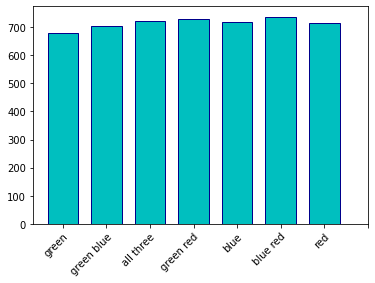

In [ ]:
#finally, to find probabilities and plot the data
from matplotlib import pyplot as plt 

#finding the list:
N = 5000
n = 3
p = .5

lst = categories(N,n,p)

#probabilities:

def props(N, lst):
  props = []
  lst = lst
  for i in range(7):
    props.append(lst.count(i+1)/N)
  return props

print(props(N, lst)) # [g, gb, gbr, gr, b, br, r] estimated proportions


#plotting the counts and the probabilities
names = ['green', 'green blue', 'all three', 'green red', 'blue', 'blue red', 'red']

fig, ax = plt.subplots()
n, bins, patches = plt.hist(lst, rwidth=.7, align='left', facecolor='c', edgecolor = 'darkblue', bins=7)

ax.set_xticks(bins)
ax.set_xticklabels(names, rotation=45, rotation_mode='anchor', ha='right')

plt.show()

In [ ]:
#Running the simulation to find an accurate mean proportion:
import numpy as np

def estprops(M,N,p): #M=total number simulations, N=cells, p=probability
  total = []
  lst = categories(N,3,p) #this is for all stains have equal chance of success, can replace with dcategories if necessary
  for i in range(M):
    total.append(props(N,lst))
  eprops = list(np.average(total, axis=0))
  pro = [round(eprops[i], 4) for i in range(7)]
  return pro

print(estprops(100,5000,.5))

#so, this concludes that, assuming every germ cell has an equal probability of being 
#stained a certain color or not, the chance that it falls into any of the 7 categories is the same, 
#approximately .1429 or 1/7. (or about 286 in every category, if N=2000)


[0.1452, 0.1458, 0.1434, 0.1424, 0.1486, 0.1396, 0.135]


[0.1334, 0.1392, 0.159, 0.1366, 0.1476, 0.144, 0.1402]


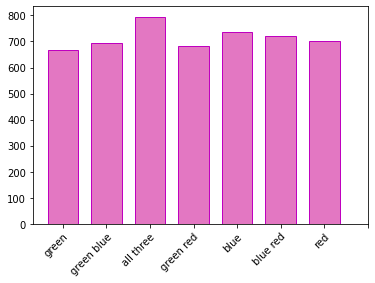

In [ ]:
#to play around with the individual stain probabilities of success:


#different probabilities of success:
def berndiff(pg, pb, pr):
  while True:
    l = [rbern1(pg), rbern1(pb), rbern1(pr)]
    if sum(l)==0:
      l = [rbern1(pg), rbern1(pb), rbern1(pr)]
    else: return l

#print(berndiff(.5,.2,.1)) #test

N = 5000
pg = .5
pb = .5
pr = .5


#categories for different probabilities of success:

def dcategories(N,pg, pb, pr):
  cells= []
  for i in range(N):
    l = berndiff(pg,pb,pr)
    if l[0]==1 and l[1]==0 and l[2]==0:
      cells.append(1)                       #1 is our number for the green cells
    elif l[0]==1 and l[1]==1 and l[2]==0:
      cells.append(2)                       #2 is green blue
    elif l[0]==1 and l[1]==1 and l[2]==1:
      cells.append(3)                       #3 is all three
    elif l[0]==1 and l[1]==0 and l[2]==1:
      cells.append(4)                       #4 is green red
    elif l[0]==0 and l[1]==1 and l[2]==0:
      cells.append(5)                       #5 is blue
    elif l[0]==0 and l[1]==1 and l[2]==1:
      cells.append(6)                       #6 is blue red
    elif l[0]==0 and l[1]==0 and l[2]==1:
      cells.append(7)                       #7 is red
  return cells

#print(dcategories(N,.2,.5,.1)) #test

lst1=dcategories(N,pg,pb,pr)

print(props(N, lst1))

#plotting the counts and the probabilities
names = ['green', 'green blue', 'all three', 'green red', 'blue', 'blue red', 'red']

fig, ax = plt.subplots()
n, bins, patches = plt.hist(lst1, rwidth=.7, align='left', facecolor='tab:pink', edgecolor = 'm', bins=7)

ax.set_xticks(bins)
ax.set_xticklabels(names, rotation=45, rotation_mode='anchor', ha='right')

plt.show()


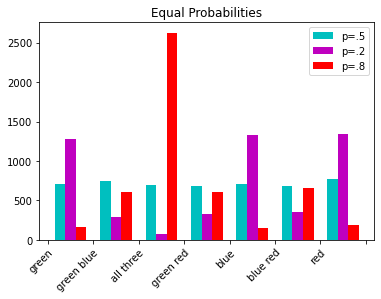

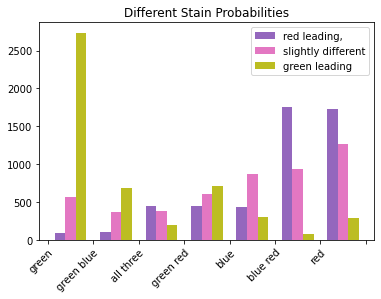

In [ ]:
# Below are some histograms showing the effects of probability of success, and you can play around with these the easiest:
n=3
N=5000

l1 = categories(N,n,.5)
l2=categories(N, n,.2)
l3=categories(N, n, .8)  

d1=dcategories(N,.2,.5,.8)
d2=dcategories(N,.3,.4,.5)
d3=dcategories(N,.7,.2,.2)

names = ['green', 'green blue', 'all three', 'green red', 'blue', 'blue red', 'red']

fig, ax = plt.subplots()
n, bins, patches = ax.hist([l1,l2,l3], rwidth=.7, bins=7, label=['p=.5', 'p=.2', 'p=.8'], color=['c','m','r'])
plt.title('Equal Probabilities')
plt.legend(loc='upper right')
ax.set_xticks(bins)
ax.set_xticklabels(names, rotation=45, rotation_mode='anchor', ha='right')
plt.show()

fig, ax = plt.subplots()
n, bins, patches = ax.hist([d1,d2,d3], rwidth=.7, bins=7, label=['red leading, ', 'slightly different', 'green leading'], color=['tab:purple','tab:pink','tab:olive'])
plt.title('Different Stain Probabilities')
plt.legend(loc='upper right')
ax.set_xticks(bins)
ax.set_xticklabels(names, rotation=45, rotation_mode='anchor', ha='right')
plt.show()

